# The Reactions of the German Stock Market to COVID-19 and Containment Policies: A Vector Autoregressive Analysis

## 10. Finding stationary timeseries for further analysis

In [33]:
# Importing the necessary python packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [2]:
# Load in the previosuly prepared datasets
df_1 = pd.read_csv("prepared_data_sample_1.csv", parse_dates=["date"])
df_1 = df_1[df_1["date"]>=pd.to_datetime("2020-02-25")].copy(deep=True)
df_2 = pd.read_csv("prepared_data_sample_2.csv", parse_dates=["date"])

# Droping unnecessary columns for now
df_1.drop(columns=['hdax_open', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday',],inplace=True)

df_2.drop(columns=['hdax_open', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday',],inplace=True)

In [3]:
# Creating new Transformations for the first sample period

# Creating three different transformations for HDAX prices (percentage-growth, log-growth, first difference)
df_1["close_pct"] = ( df_1["hdax_close"] - df_1["hdax_close"].shift(1) ) / df_1["hdax_close"].shift(1)
df_1["close_log"] = ( np.log(df_1["hdax_close"]) - np.log(df_1["hdax_close"].shift(1)))
df_1["close_diff"] = ( df_1["hdax_close"] - df_1["hdax_close"].shift(1) )

# Creating three different transformations for total cases (percentage-growth, log-growth, first difference)
df_1["total_pct"] = ( df_1["total_cases"] - df_1["total_cases"].shift(1) ) / df_1["total_cases"].shift(1)
df_1["total_log"] = ( np.log(df_1["total_cases"]) - np.log(df_1["total_cases"].shift(1)))
df_1["total_diff"] = ( df_1["total_cases"] - df_1["total_cases"].shift(1) )

# Creating three different transformations for new cases (percentage-growth, log-growth, first difference)
df_1["new_pct"] = ( df_1["new_cases"] - df_1["new_cases"].shift(1) ) / df_1["new_cases"].shift(1)
df_1["new_log"] = ( np.log(df_1["new_cases"]) - np.log(df_1["new_cases"].shift(1)))
df_1["new_diff"] = ( df_1["new_cases"] - df_1["new_cases"].shift(1) )

# Creating three different transformations for Stringency Index (percentage-growth, log-growth, first difference)
df_1["stringency_pct"] = ( df_1["stringency_index"] - df_1["stringency_index"].shift(1) ) / df_1["stringency_index"].shift(1)
df_1["stringency_log"] = ( np.log(df_1["stringency_index"]) - np.log(df_1["stringency_index"].shift(1)))
df_1["stringency_diff"] = ( df_1["stringency_index"] - df_1["stringency_index"].shift(1) )

# Creating three different transformations for Containment Index (percentage-growth, log-growth, first difference)
df_1["containment_pct"] = ( df_1["containment_index"] - df_1["containment_index"].shift(1) ) / df_1["containment_index"].shift(1)
df_1["containment_log"] = ( np.log(df_1["containment_index"]) - np.log(df_1["containment_index"].shift(1)))
df_1["containment_diff"] = ( df_1["containment_index"] - df_1["containment_index"].shift(1) )

In [4]:
# Creating new Transformations for the first sample period

# Creating three different transformations for HDAX prices (percentage-growth, log-growth, first difference)
df_2["close_pct"] = ( df_2["hdax_close"] - df_2["hdax_close"].shift(1) ) / df_2["hdax_close"].shift(1)
df_2["close_log"] = ( np.log(df_2["hdax_close"]) - np.log(df_2["hdax_close"].shift(1)))
df_2["close_diff"] = ( df_2["hdax_close"] - df_2["hdax_close"].shift(1) )

# Creating three different transformations for total cases (percentage-growth, log-growth, first difference)
df_2["total_pct"] = ( df_2["total_cases"] - df_2["total_cases"].shift(1) ) / df_2["total_cases"].shift(1)
df_2["total_log"] = ( np.log(df_2["total_cases"]) - np.log(df_2["total_cases"].shift(1)))
df_2["total_diff"] = ( df_2["total_cases"] - df_2["total_cases"].shift(1) )

# Creating three different transformations for new cases (percentage-growth, log-growth, first difference)
df_2["new_pct"] = ( df_2["new_cases"] - df_2["new_cases"].shift(1) ) / df_2["new_cases"].shift(1)
df_2["new_log"] = ( np.log(df_2["new_cases"]) - np.log(df_2["new_cases"].shift(1)))
df_2["new_diff"] = ( df_2["new_cases"] - df_2["new_cases"].shift(1) )

# Creating three different transformations for Stringency Index (percentage-growth, log-growth, first difference)
df_2["stringency_pct"] = ( df_2["stringency_index"] - df_2["stringency_index"].shift(1) ) / df_2["stringency_index"].shift(1)
df_2["stringency_log"] = ( np.log(df_2["stringency_index"]) - np.log(df_2["stringency_index"].shift(1)))
df_2["stringency_diff"] = ( df_2["stringency_index"] - df_2["stringency_index"].shift(1) )

# Creating three different transformations for Containment Index (percentage-growth, log-growth, first difference)
df_2["containment_pct"] = ( df_2["containment_index"] - df_2["containment_index"].shift(1) ) / df_2["containment_index"].shift(1)
df_2["containment_log"] = ( np.log(df_2["containment_index"]) - np.log(df_2["containment_index"].shift(1)))
df_2["containment_diff"] = ( df_2["containment_index"] - df_2["containment_index"].shift(1) )

In [5]:
# Reordering the columns

df_1 = df_1[['date',
             'hdax_close', 'close_pct', 'close_log', 'close_diff',
             'total_cases', 'total_pct', 'total_log', 'total_diff',
             'new_cases', 'new_pct', 'new_log', 'new_diff',
             'stringency_index', 'stringency_pct', 'stringency_log', 'stringency_diff',
             'containment_index', 'containment_pct', 'containment_log', 'containment_diff',
             ]].copy(deep=True)

df_2 = df_2[['date',
             'hdax_close', 'close_pct', 'close_log', 'close_diff',
             'total_cases', 'total_pct', 'total_log', 'total_diff',
             'new_cases', 'new_pct', 'new_log', 'new_diff',
             'stringency_index', 'stringency_pct', 'stringency_log', 'stringency_diff',
             'containment_index', 'containment_pct', 'containment_log', 'containment_diff',
             ]].copy(deep=True)

In [6]:
# Creating a function that takes a timeseries as an input, performs a KPSS test for stationarity on the data
# and returns the test-statistic, the p-value the chosen the truncation lag parameter and the critical values
# H0: The data is stationary around a constant mean
# H1: The series is not stationary

from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    return kpsstest

# Creating a function that determines whether an input p-value indicates stationarity or non-stationarity
# Default statistic significance level is set to 5%
def kpss_stationarity(p_value, level=0.05):
    if p_value <= level:
        return "Non-Stationary"
    else:
        return "Stationary"
    
    
# -----------------------------------------------------------------------------------------------------------
    
    
# Creating a function that takes a timeseries as an input, chooses a lag-length based on the AIC,
# performs a ADF test for stationarity on the data and returns the test-statistic,
# MacKinnon’s approximate p-value, the chosen lag length, the number of observations and the critical values
# H0: The series has a unit root (series is not stationary)
# H1: The series has no unit root (series is stationary)    
    
from statsmodels.tsa.stattools import adfuller   

def adf_test(timeseries):
    adftest = adfuller(timeseries, autolag="AIC", regression='c')
    return adftest

# Creating a function that determines whether an input p-value indicates stationarity or non-stationarity
# Default statistic significance level is set to 5%
def adf_stationarity(p_value, level=0.05):
    if p_value <= level:
        return "Stationary"
    else:
        return "Non-Stationary"

In [7]:
columns = list(df_1.columns)
columns.remove("date")
columns

['hdax_close',
 'close_pct',
 'close_log',
 'close_diff',
 'total_cases',
 'total_pct',
 'total_log',
 'total_diff',
 'new_cases',
 'new_pct',
 'new_log',
 'new_diff',
 'stringency_index',
 'stringency_pct',
 'stringency_log',
 'stringency_diff',
 'containment_index',
 'containment_pct',
 'containment_log',
 'containment_diff']

In [8]:
#Creating a table for both samples with the results of the two tests for each timeseries

results_sample_1 = pd.DataFrame({"Timeseries": columns,
                        "adf_p_value": [adf_test(df_1[column].dropna())[1] for column in columns],
                        "kpss_p_value": [kpss_test(df_1[column].dropna())[1] for column in columns],})
results_sample_1["adf_stationarity"] = results_sample_1["adf_p_value"].apply(adf_stationarity)
results_sample_1["kpss_stationarity"] = results_sample_1["kpss_p_value"].apply(kpss_stationarity)



results_sample_2 = pd.DataFrame({"Timeseries": columns,
                        "adf_p_value": [adf_test(df_2[column].dropna())[1] for column in columns],
                        "kpss_p_value": [kpss_test(df_2[column].dropna())[1] for column in columns],})
results_sample_2["adf_stationarity"] = results_sample_2["adf_p_value"].apply(adf_stationarity)
results_sample_2["kpss_stationarity"] = results_sample_2["kpss_p_value"].apply(kpss_stationarity)

/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of t

In [9]:
results_sample_1

,Timeseries,adf_p_value,kpss_p_value,adf_stationarity,kpss_stationarity
0,hdax_close,4.695585e-01,0.017996,Non-Stationary,Non-Stationary
1,close_pct,8.546624e-02,0.100000,Non-Stationary,Stationary
2,close_log,9.019371e-02,0.100000,Non-Stationary,Stationary
3,close_diff,1.130960e-01,0.081428,Non-Stationary,Stationary
4,total_cases,8.702479e-02,0.010000,Non-Stationary,Non-Stationary
5,total_pct,2.748937e-03,0.010000,Stationary,Non-Stationary
6,total_log,8.179813e-02,0.010000,Non-Stationary,Non-Stationary
7,total_diff,2.710849e-01,0.054324,Non-Stationary,Stationary
8,new_cases,3.718589e-02,0.060375,Stationary,Stationary
9,new_pct,8.634915e-20,0.063363,Stationary,Stationary


In [10]:
results_sample_2

,Timeseries,adf_p_value,kpss_p_value,adf_stationarity,kpss_stationarity
0,hdax_close,7.671588e-01,0.010000,Non-Stationary,Non-Stationary
1,close_pct,1.775296e-13,0.100000,Stationary,Stationary
2,close_log,1.820694e-13,0.100000,Stationary,Stationary
3,close_diff,1.101457e-14,0.100000,Stationary,Stationary
4,total_cases,1.522137e-01,0.010000,Non-Stationary,Non-Stationary
5,total_pct,3.181772e-01,0.010000,Non-Stationary,Non-Stationary
6,total_log,3.149767e-01,0.010000,Non-Stationary,Non-Stationary
7,total_diff,1.782595e-01,0.064200,Non-Stationary,Stationary
8,new_cases,3.430937e-01,0.056209,Non-Stationary,Stationary
9,new_pct,1.484397e-03,0.100000,Stationary,Stationary


### Results:
* For the stock market prices we will use the daily returns (%). Because of some high percentages, the log-returns would be unprecise
* For the Covid-19 cases we will use the change in daily new cases (%). Because of some high percentages, the log-returns would be unprecise
* As a proxy for the policy reactions, we will use the containment-index first difference.

## 11. Saving only the chosen timeseries in a seperate file for further analysis

In [52]:
# Saving the first sample ready for input into VAR Model

sample_1 = pd.read_csv("prepared_data_sample_1.csv", parse_dates=["date"])

sample_1["hdax_pct"] = ( sample_1["hdax_close"] - sample_1["hdax_close"].shift(1) ) / sample_1["hdax_close"].shift(1)
sample_1["new_cases_pct"] = ( sample_1["new_cases"] - sample_1["new_cases"].shift(1) ) / sample_1["new_cases"].shift(1)
sample_1["containment_diff"] = ( sample_1["containment_index"] - sample_1["containment_index"].shift(1) )

sample_1.drop(columns=["hdax_open", "hdax_close", "total_cases", "new_cases", "stringency_index",
                       "containment_index"], inplace=True)

sample_1 = sample_1[["date", "hdax_pct", "new_cases_pct", "containment_diff", "Monday", "Tuesday", "Wednesday", "Thursday"]]

sample_1.set_index("date", drop=True, inplace=True)

sample_1.to_csv("transformed_data_sample_1.csv")

In [51]:
# Saving the second sample ready for input into VAR Model

sample_2 = pd.read_csv("prepared_data_sample_2.csv", parse_dates=["date"])

sample_2["hdax_pct"] = ( sample_2["hdax_close"] - sample_2["hdax_close"].shift(1) ) / sample_2["hdax_close"].shift(1)
sample_2["new_cases_pct"] = ( sample_2["new_cases"] - sample_2["new_cases"].shift(1) ) / sample_2["new_cases"].shift(1)
sample_2["containment_diff"] = ( sample_2["containment_index"] - sample_2["containment_index"].shift(1) )

sample_2.drop(columns=["hdax_open", "hdax_close", "total_cases", "new_cases", "stringency_index",
                       "containment_index"], inplace=True)

sample_2 = sample_2[["date", "hdax_pct", "new_cases_pct", "containment_diff", "Monday", "Tuesday", "Wednesday", "Thursday"]]

sample_2.set_index("date", drop=True, inplace=True)

sample_2.to_csv("transformed_data_sample_2.csv")

## 11. Plotting the chosen timeseries

<AxesSubplot:xlabel='date', ylabel='containment_diff'>

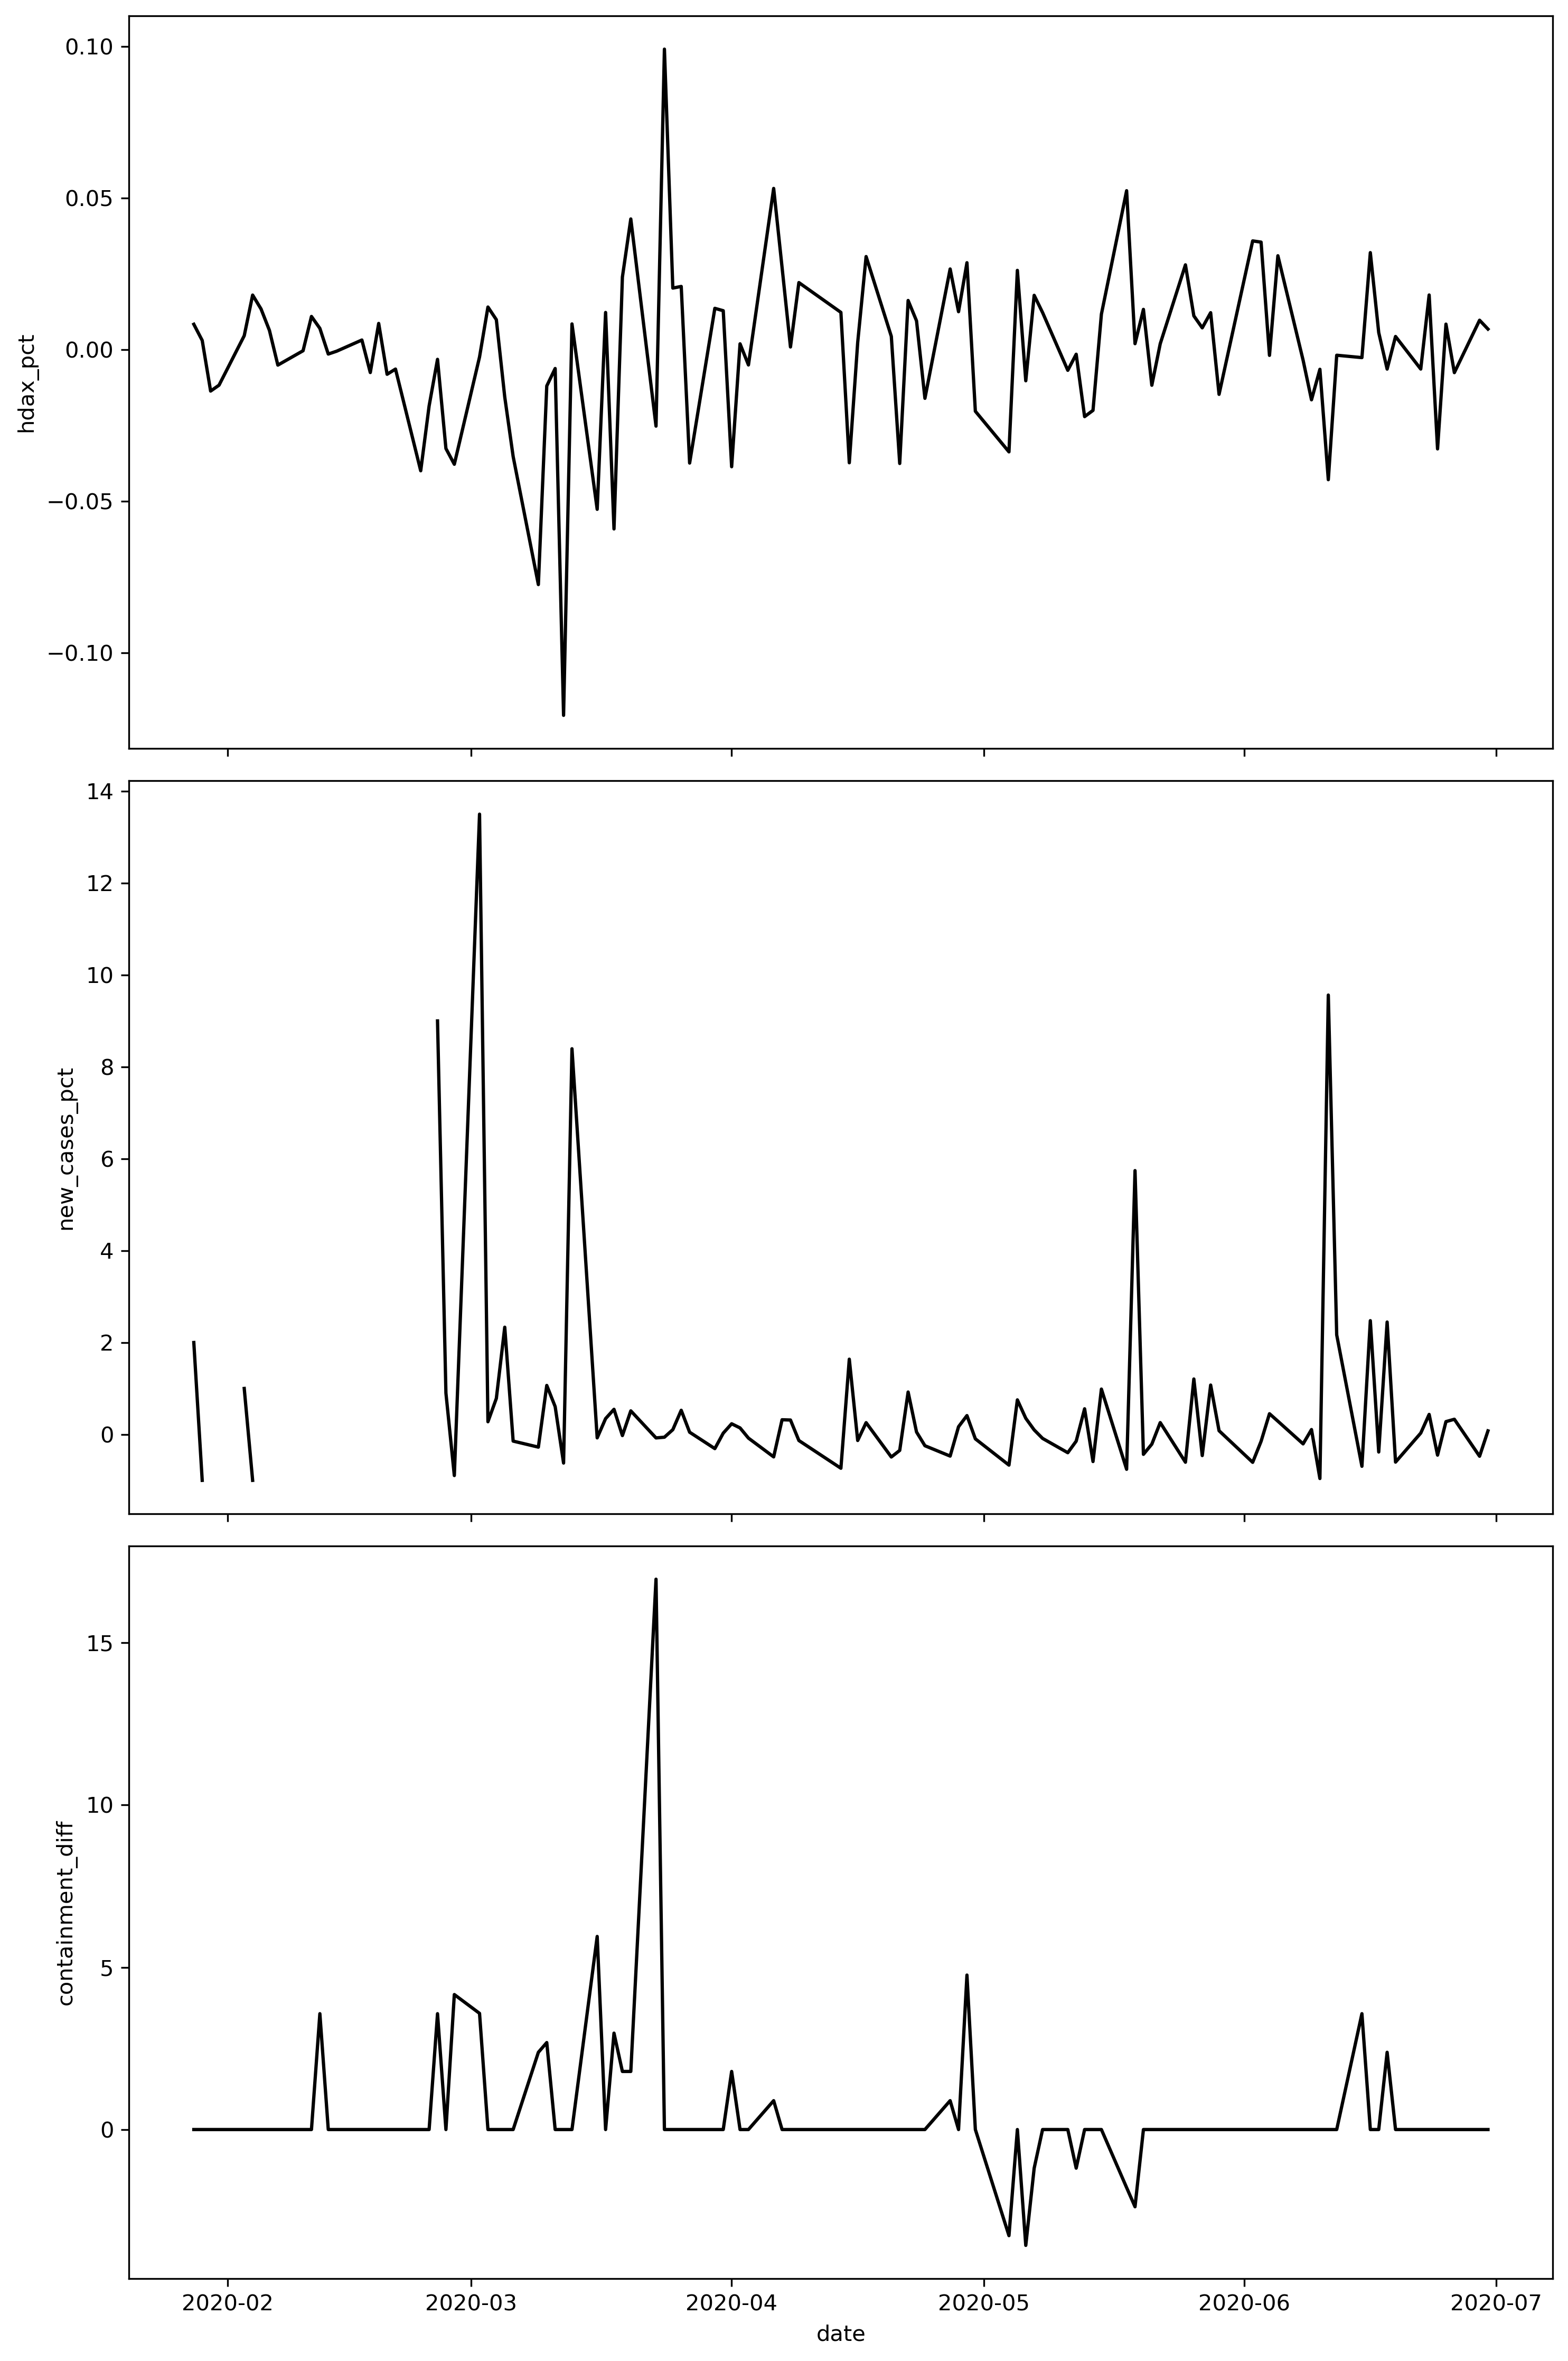

In [63]:
fig, axes = plt.subplots(3,1, tight_layout = True, figsize=(10,15), sharex=True, dpi=300)

sns.lineplot(data=sample_1, x=sample_1.index, y="hdax_pct", ax=axes[0], color="black")
sns.lineplot(data=sample_1, x=sample_1.index, y="new_cases_pct", ax=axes[1], color="black")
sns.lineplot(data=sample_1, x=sample_1.index, y="containment_diff", ax=axes[2], color="black")

<AxesSubplot:xlabel='date', ylabel='containment_diff'>

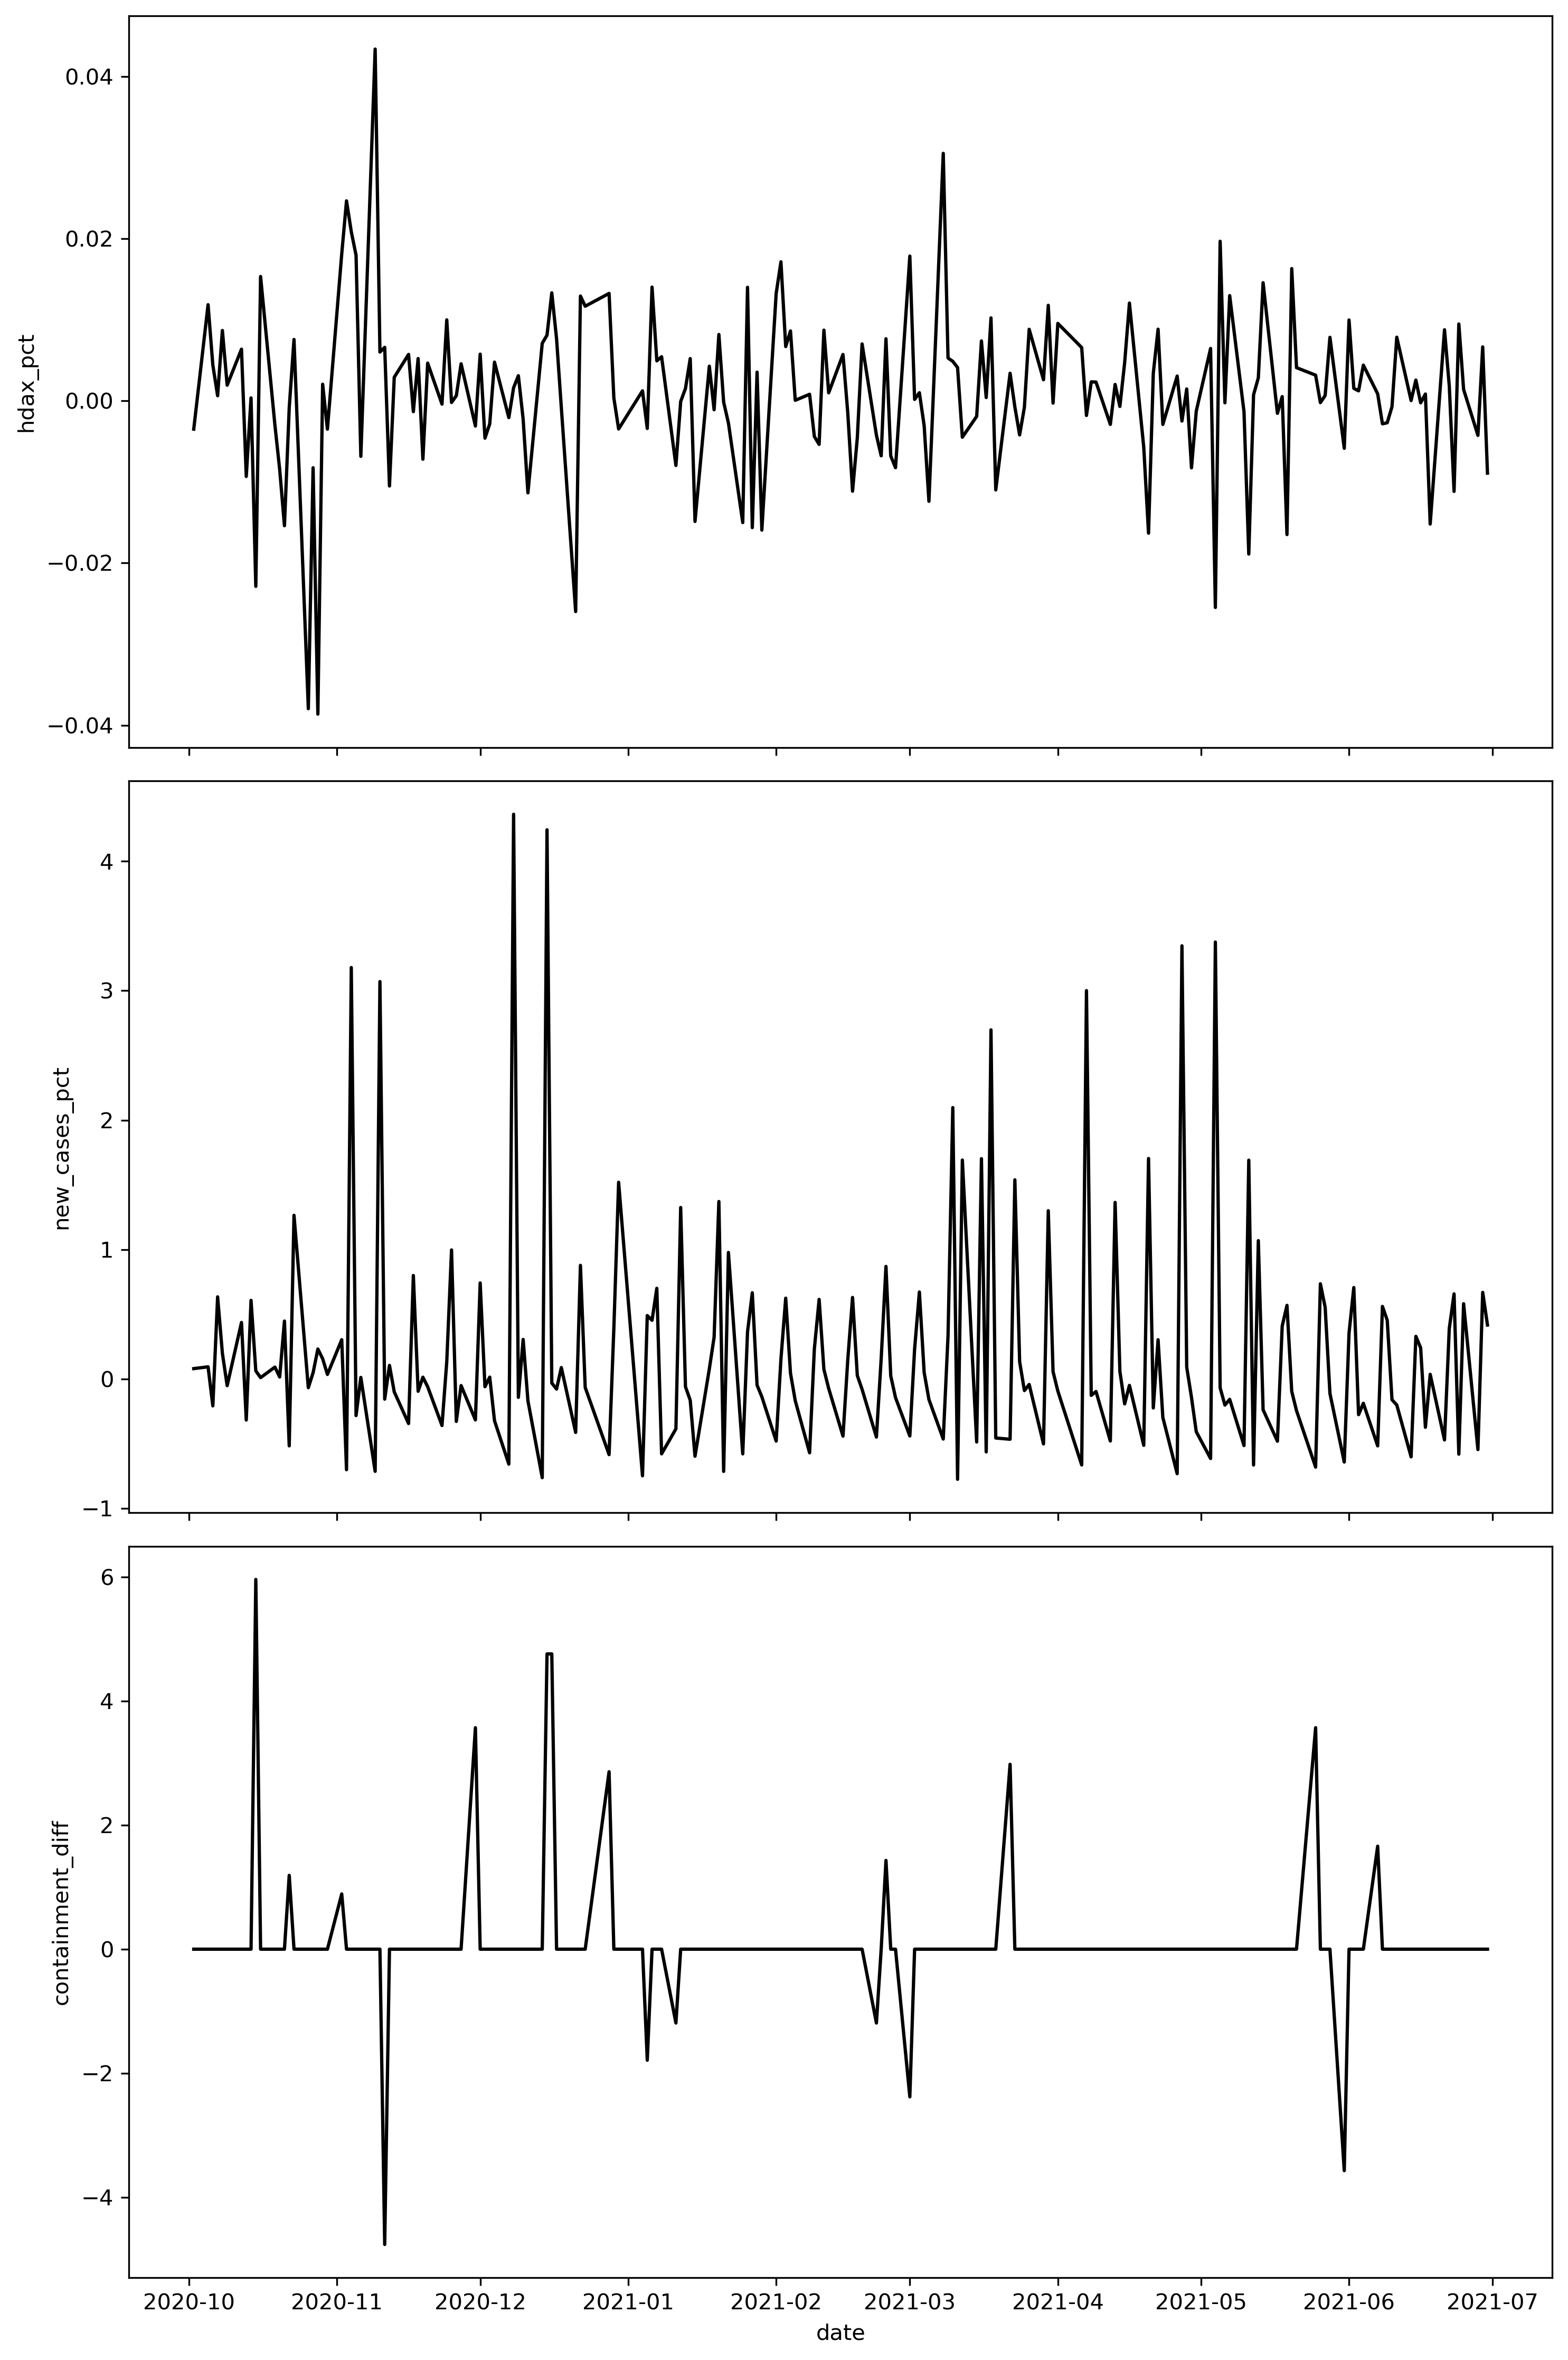

In [64]:
fig, axes = plt.subplots(3,1, tight_layout = True, figsize=(10,15), sharex=True, dpi=300)

sns.lineplot(data=sample_2, x=sample_2.index, y="hdax_pct", ax=axes[0], color="black")
sns.lineplot(data=sample_2, x=sample_2.index, y="new_cases_pct", ax=axes[1], color="black")
sns.lineplot(data=sample_2, x=sample_2.index, y="containment_diff", ax=axes[2], color="black")